In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

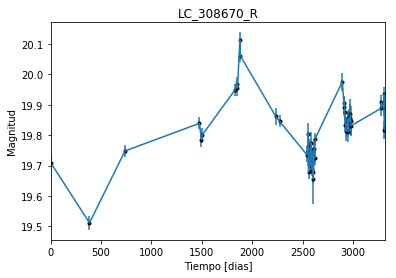

In [2]:
data = np.genfromtxt('LC_308670_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_308670_R')
plt.savefig("LC_308670_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

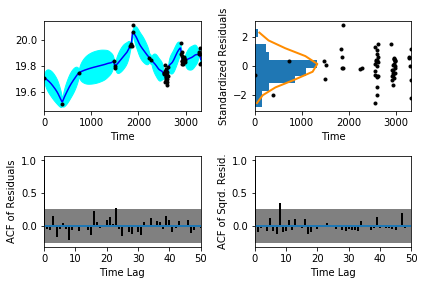

In [5]:
sample.assess_fit()

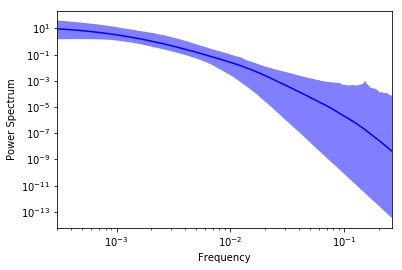

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

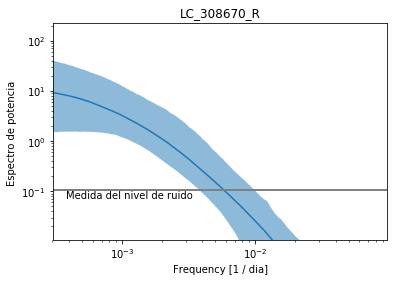

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_308670_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_308670_R')

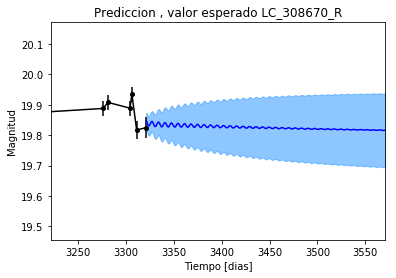

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_308670_R')

Text(0.5,1,'Prediccion, Caminos simulados_LC_308670_R')

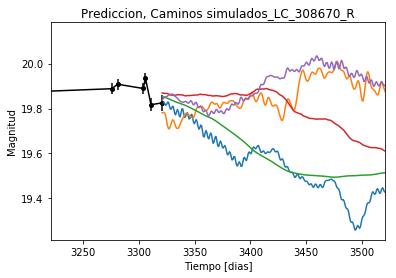

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_308670_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


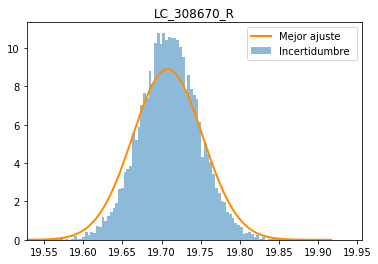

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_308670_R')
plt.savefig("Mejor_ajuste_LC_308670_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_308670_R')

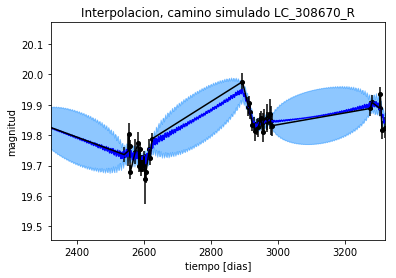

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_308670_R')

Text(0.5,1,'Interpolacion, camino simulado LC_308670_R')

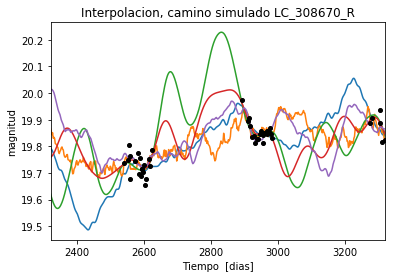

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_308670_R')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1504.47891123
Median: 0.0132908038067
Standard deviation: 0.104043137153
68% credibility interval: [ 0.0015654  0.1249273]
95% credibility interval: [ 0.00041405  0.4052744 ]
99% credibility interval: [  3.38927946e-04   5.02230995e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 658.957673994
Median: 0.00451834522169
Standard deviation: 0.0537842717829
68% credibility interval: [ 0.00070323  0.03162481]
95% credibility interval: [ 0.0003491   0.19230115]
99% credibility interval: [  3.11096668e-04   3.86993267e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 3105.54199517
Median: 0.0272095893342
Standard deviation: 0

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1440.34142424
Median: 117.118201473
Standard deviation: 1.71299520056
68% credibility interval: [ 115.1767158   118.34799257]
95% credibility interval: [ 112.67572954  119.11703498]
99% credibility interval: [ 110.566776    119.84937096]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 349.109371845
Median: 0.59145710978
Standard deviation: 1.27473771277
68% credibility interval: [ 0.10355685  2.49732326]
95% credibility interval: [ 0.02934822  4.38479513]
99% credibility interval: [ 0.01456344  5.92983505]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 673.159388271
Median: 0.607640324527
Standard deviation: 2.78618633696
68% credibility interval: [ 0.03800036  3.69724223]
95% credibility interval: [  4.09786980e-03

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 618.709826967
Median: 2.38732300029e-28
Standard deviation: 1.29796802721e+54
68% credibility interval: [  1.25498536e-61   5.20899960e-07]
95% credibility interval: [  2.05666824e-108   1.67871193e+001]
99% credibility interval: [  2.91183836e-127   2.23152516e+034]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2456.56171414
Median: 19.8032929879
Standard deviation: 0.0692050543342
68% credibility interval: [ 19.74162586  19.86345792]
95% credibility interval: [ 19.66015563  19.93842528]
99% credibility interval: [ 19.59726188  20.00701622]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 335.552426988
Median: 0.0200153857968
Standard deviation: 0.138732592644
68% credibility interval: [ 0.          0.25269294]
95% credibility interval: [ 0.          0.45444296]
99% credibility interval: [ 0.          0.51131532]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 335.552426988
Median: 0.0200153857968
Standard deviation: 0.138732592644
68% credibility interval: [ 0.          0.25269294]
95% credibility interval: [ 0.          0.45444296]
99% credibility interval: [ 0.          0.51131532]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 749.212894648
Median: 0.0
Standard deviation: 0.000586424530623
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1440.34142424
Median: 117.118201473
Standard deviation: 1.71299520056
68% credibility interval: [ 115.1767158   118.34799257]
95% credibility interval: [ 112.67572954  119.11703498]
99% credibility interval: [ 110.566776    119.84937096]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2392.58293432
Median: 0.0236186392106
Standard deviation: 0.0215954147251
68% credibility interval: [ 0.01482791  0.04112934]
95% credibility interval: [ 0.0100552   0.07857735]
99% credibility interval: [ 0.00790801  0.1295594 ]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1822.52512229
Median: 1.09847748781
Standard deviation: 0.189593808743
68% credibility interval: [ 0.92934279  1.29369228]
95% credibility interval: [ 0.78704338  1.51933312]
99% credibility interval: [ 0.6781425   1.69082602]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 560.446812622
Median: 0.000470347931299
Standard deviation: 0.0237794130272
68% credibility interval: [  1.84054826e-05   6.40344927e-03]
95% credibility interval: [  6.80099426e-07   7.38642212e-02]
99% credibility interval: [  5.41945561e-39   1.64265803e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1504.47891123
Median: (-0.0835085831988-1.57842427618j)
Standard deviation: 1.08957945705
68% credibility interval: [-0.78494135+0.j         -0.00983570-0.01209196j]
95% credibility interval: [-2.54641413+0.j         -0.00260154-2.99461379j]
99% credibility interval: [ -3.15561041e+00+0.j          -2.12954709e-03-0.01293462j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 658.957673994
Median: (-0.0283896003097+0.0848141635041j)
Standard deviation: 0.934896594828
68% credibility interval: [-0.19870457+2.72427814j -0.00441854+1.30187432j]
95% credibility interval: [-1.20826376+2.91894051j -0.00219345+0.j        ]
99% credibility interval: [ -2.43155041e+00 +1.45766708e+00j  -1.95467801e-03 +2.56756073e-04j]
Posterior s